In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import numpy as np 
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
sns.set()

In [2]:
#parameters Adapted from code in class session 4.2_preclass
class MultiLaneSimulation:
    def __init__(self, length = 100, density = 0.1, v_max = 5, slow_down_prob= 0.5, number_of_lanes = 2):
  #defining class parameters length = 100, density = 0.1, v_max = 5, slow_down_prob= 0.5, number_of_lanes = 2
             
        self.length = length
        self.density = density
        self.v_max = v_max
        self.slow_down_prob = slow_down_prob
        self.number_of_lanes = number_of_lanes
        # Update car velocities.
        self.state = [v_max if i <= length*number_of_lanes*density else -1 for i in range(length*number_of_lanes)]
        np.random.shuffle(self.state)
        self.state = np.reshape(self.state,(number_of_lanes, length))

    def switch_lane(self):
        c = np.copy(self.state)
        
        for m in range(len(self.state)):
            for i, s in enumerate(self.state[m]):
                if s >= 0:
                    j = 1
                    
                    # Checks distance in front if there is distance no need to switch lane
                    while c[m, (i + j) % self.length] == -1 and j <= s + 1: j += 1
                    if j > (s+1): 
                        continue
                        
                    # Check if left lane, then right lane is suitable for a switch. 
                    for lanes in (m-1, m+1):
                        # if lane is not available do not switch,
                        if lanes < 0 or lanes + 1 > self.number_of_lanes: 
                            continue
                        
                        # if not enough distance in ahead or back do not switch
                        distance_front =0
                        distance_back = 0
                        while c[lanes, (i + distance_front) % self.length] == -1 and distance_front <= s + 1: 
                            distance_front += 1
                        while c[lanes, (i - distance_back) % self.length] == -1 and distance_back <= self.v_max:
                            distance_back += 1
                        if distance_front < s or distance_back < self.v_max: 
                            continue

                        c[m, i]=-1
                        c[lanes, i] =s
                        break

        self.state = c

    def update_rule(self):
        new_state = -np.ones((self.number_of_lanes, self.length), int)

        f = 0
        for k in range(self.number_of_lanes):
            for i, s in enumerate(self.state[k]):
                if i + s > self.length:
                    f += 1
                if s >= 0:
                    (new_state[k,(i + s) % self.length]) = s

        self.state = new_state
        return f/self.number_of_lanes
    def calculate_distance(self):
        for m in range(len(self.state)):
            for i, v in enumerate(self.state[m]):
                if v >= 0:
                    distance = 1
                    while self.state[m, (i + distance) % self.length] == -1: 
                        distance += 1

                    self.state[m, i] = (min(self.state[m, i] + 1, self.v_max)) if distance > v + 1 else (distance - 1)

                if (self.state[m, i] > 0 and np.random.random() < self.slow_down_prob): 
                    self.state[m, i] -= 1

    def calling_all(self, n, verbose = False, switching = True):
        f = []
        for _ in range(n):
            if verbose: 
                self.display()
            if switching: 
                self.switch_lane()
            self.calculate_distance()
            f.append(self.update_rule())

        return np.mean(f)
    
    def compile_all_and_print(self, verbose = False):
        if verbose:
            print("before switching"), display(); 
            for _ in range(2):
                print("switch_lane"), switch_lane(); display(); 
                print("calculate_distance"), calculate_distance(); display(); 
                print("update_rule"), update_rule(); display(); 
            print("switch")
        else:
            for _ in range(2):
                display(); 
                switch_lane(); 
                calculate_distance(); 
                update_rule();
            display()
    def display(self):
        print('\n'.join(''.join('.' if x == -1 else str(x) for x in row) for row in self.state) + "\n")     

In [3]:
if __name__ == '__main__':
    np.random.seed(13)
    multi = MultiLaneSimulation(length = 100, density = 0.1,v_max = 5, slow_down_prob = 0.5)
    multi.calling_all(10, verbose = True, switching = True)

.......................5.........5.5.5..........5...5..55................5....5.....................
....5.....5......5.....5......................55........5................5...5......5...........5...

........4............4.....4........1....4.........3.1.0.....5..............3.....4.................
.5.............5...........4.........4........0.....5.......4..............2......5......5..........

.............5...........4......5.....2.......5.....10..1........4..............4.....4.............
.....4.............4............5........4.....1.........5......4............2........4.......5.....

..................5..........4......4...2.........4..0....2..........4...............5.....5........
..........5............4............4.........5.1....1.......4......4...........3.........4........5

.......................5..........5...2....3.......1..1.....2.............5.....................5...
....5.........4............4............4......1..2....2..........5.....4...........4..

In [4]:
if __name__ == '__main__':
    np.random.seed(13)
    multi = MultiLaneSimulation(length = 100, density = 0.4,v_max = 5, slow_down_prob = 0.5)
    multi.calling_all(10, verbose = True, switching = True)

..5...5.....55...5.5..55.....5...555.5...55.....5..55.555...55..5..5..5.55....5..55555.5....55..5.55
..5.5.5...55.....55.55555..55..5.5.5..555...5.55.5......5..5..5.....555555.5.5......5555........55..

.2..2.....4.0..2..1.1.0.....5..2.00.1..2.0....4...200.00..2.0..2.1..1..10....4..20000.1...3.0..2.10.
3..10....30....4.0.10000.1.0.1.0..1.1.00...3.100.....4...1...2.....5000000.0.....4..000....4....0...

...2..2....1.1...20.0..1.....1.0.00..1..10.......300.10.1.0..1.0...2.1.0.1.....200000..1..0..1..10.1
..200....0.1...0.0.0000.1.10.0.0..0..100....1000.......2...2....3..000000.1.1.....1.000........4.1..

1....2..2..0..1..00.0...1....0..100....200....0..000...10..1.0..1...1.10..1....0.1000....2.1...20.1.
..00.1...0...2..10.000.10.00..10..0..00.1...00.0.....0...2...2...1.00000.1.1.1...0.1000.........1.1.

..2...1..1.0...1.0.10....1...0..00.1...00.1....1.00.1..00..0..1...2..100...1...0.0000.....1..2.0.10.
..00..1...1...1.00.000.00.00..00...1.00..1..00.0......1.....3..2..100000.0..1.1..0.000.

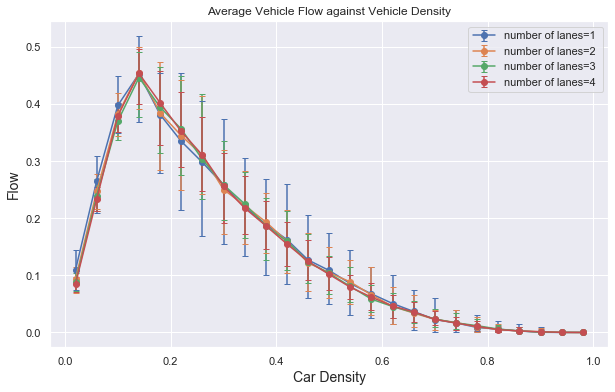

In [6]:
fig, ax = plt.subplots(figsize = (10,6))

densities = np.arange(0.02, 1, 0.04).repeat(100)

for i in range(1,5):
    m_flow = [MultiLaneSimulation(100, s, 5, 0.2, number_of_lanes = i).calling_all(n=100) for s in densities]
             
    plt.errorbar(np.arange(0.02, 1, 0.04),  np.mean(np.reshape(m_flow, (-1,100)), axis = 1),
             yerr = np.abs(np.mean(np.reshape(m_flow, (-1,100)), axis = 1) - 
                           np.percentile(np.reshape(m_flow, (-1,100)), [2.5,97.5], axis = 1)),
            fmt = '-o', capsize = 3, label = f"number of lanes={i} ")

plt.xlabel('Car Density', fontsize = 14)
plt.ylabel('Flow', fontsize = 14)

plt.legend(loc='upper right');
plt.title("Average Vehicle Flow against Vehicle Density")
plt.show()